In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model , metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score,r2_score,max_error,mean_absolute_error,median_absolute_error,mean_squared_error
from math import sqrt
import joblib
%matplotlib inline

In [31]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

In [32]:
init_notebook_mode(connected=True)
cf.go_offline()

In [33]:
df=pd.read_csv('DAP.csv')

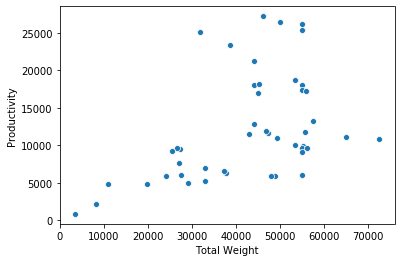

In [34]:
sns.scatterplot(x='Total Weight',y='Productivity',data=df)

In [35]:
df.describe()

,Unnamed: 0,VCN,TAT (ATB -ATUB)\nHOUR,TAT\n(ATA - ATD)\nHOUR,Total Weight,QTY IN LAKH MT,Qty in MMT,TEUs ('000),Port Delay (Hrs),Vessel Delay (Hrs),Productivity,DEAD WT
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.0,46.000000,46.000000,46.000000,40.000000
mean,1372.173913,193705.108696,89.185652,115.921739,42417.479130,0.423696,0.042370,0.0,16.558261,0.977826,12218.913478,50705.765100
std,162.427598,3416.976488,53.949582,80.783511,15071.636445,0.150855,0.015085,0.0,27.927002,4.678491,7001.183298,10219.169266
min,771.000000,191182.000000,0.000000,0.000000,3410.000000,0.030000,0.003000,0.0,0.000000,0.000000,837.240000,28229.000000
25%,1304.250000,191847.500000,52.620000,56.812500,32034.750000,0.322500,0.032250,0.0,0.000000,0.000000,6370.222500,46080.500000
50%,1384.500000,192236.500000,83.940000,98.675000,45635.000000,0.455000,0.045500,0.0,3.800000,0.000000,10447.530000,53174.750000
75%,1499.750000,193058.750000,132.087500,163.337500,54994.000000,0.550000,0.055000,0.0,21.875000,0.000000,17382.245000,56876.750000
max,1657.000000,200839.000000,220.000000,298.700000,72486.000000,0.720000,0.072000,0.0,112.250000,31.000000,27236.840000,74812.000000


In [36]:
X=df[['Total Weight']]
y=df['Productivity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [37]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
print(lm.intercept_)

4048.808596104538


In [39]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Total Weight,0.195032


In [40]:
predictions = lm.predict(X_test)

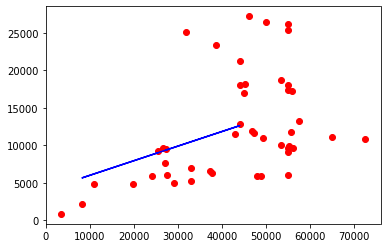

In [41]:
plt.scatter(X,y,color="red")
plt.plot(X_test, predictions, color="blue")

In [42]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))#Main
print('r2_score:',r2_score(y_test,predictions))

MAE: 1161.059519429317
MSE: 3130496.838100129
RMSE: 1769.321010472698
r2_score: 0.745250815847657


In [43]:
#joblib.dump(lm,"Acetic_Acid.pkl")#only execute if rmse is less than half of mean of productivity